# Exploratory Data Analysis

https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a

# Import Libraries

In [1]:
import os
from utils.plotting import (
    plot_class_distributions,
    plot_image_size_distribution,
    calculate_image_sizes,
    plot_class_samples,
    plot_preprocessed_class_samples,
    plot_preprocessed_class_distributions
)
from collections import Counter
from utils.preprocessing import load_preprocessed_data, load_preprocessor

I0000 00:00:1733354914.755295 1283486 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## Define Data Variables

In [2]:
#define the base data directory and the path to the training data subdirectory
#base directory containing all data
data_directory = "data"
#path to the "train" folder
train_directory = os.path.join(data_directory, "train")
#all 29 classes (A-Z, nothing, space, del)
classes = sorted(os.listdir(train_directory))

W0000 00:00:1733354914.761552 1283573 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


# Raw Class Distribution Visualization

W0000 00:00:1733354914.771089 1283582 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Class Distribution Visualization


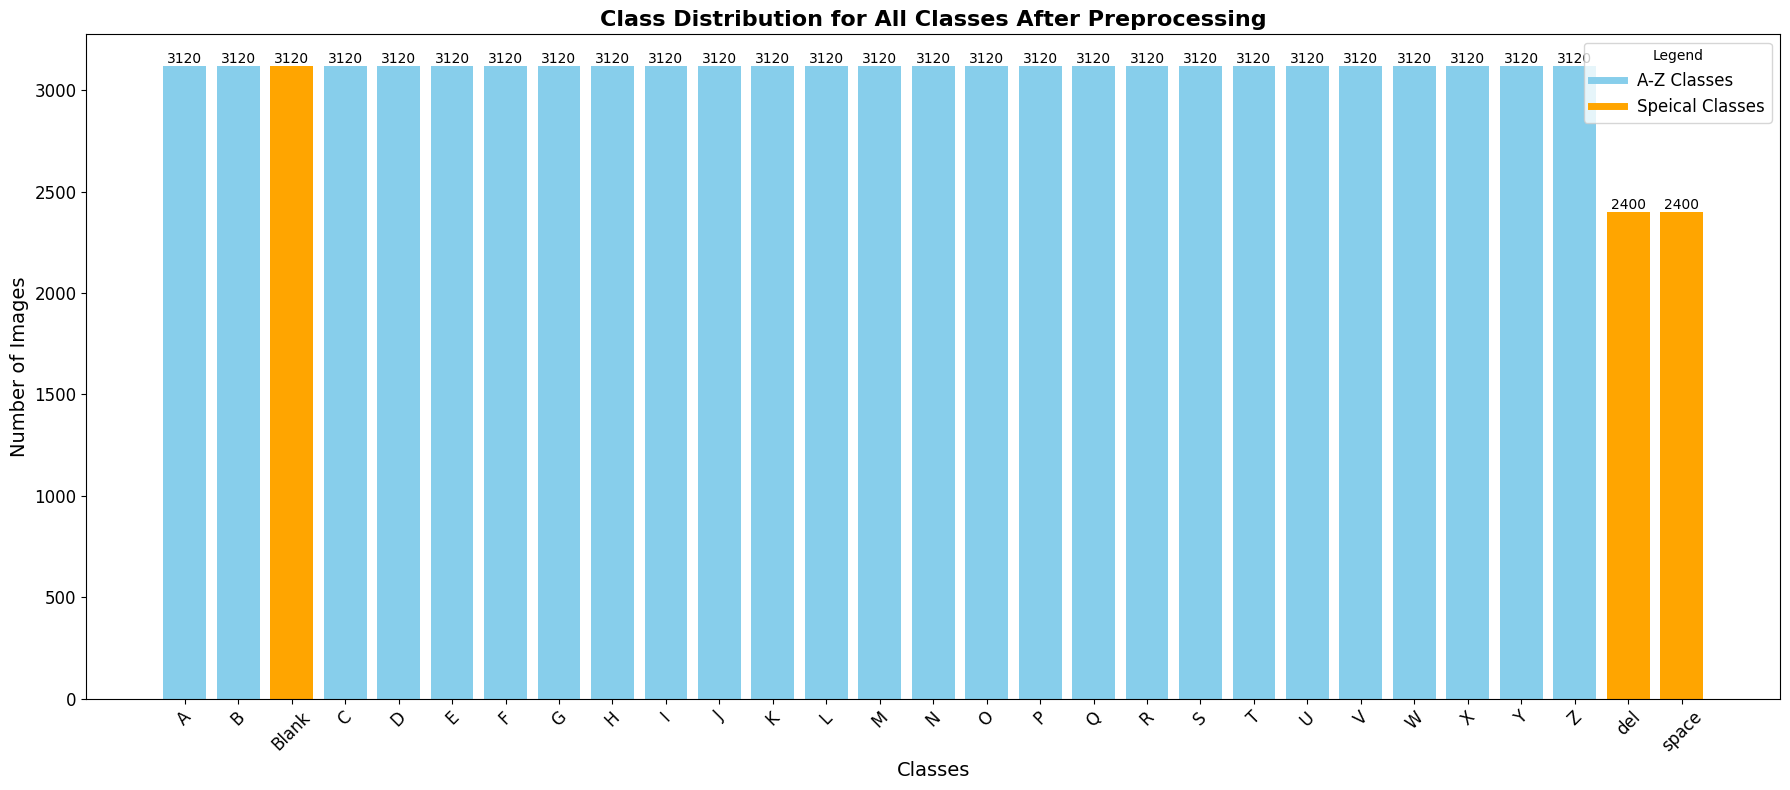

In [3]:
#run the class distribution visualization function
print("Class Distribution Visualization")
plot_class_distributions(classes=classes, train_dir=train_directory)

# Viewing a Sampling of Images

Class Samples


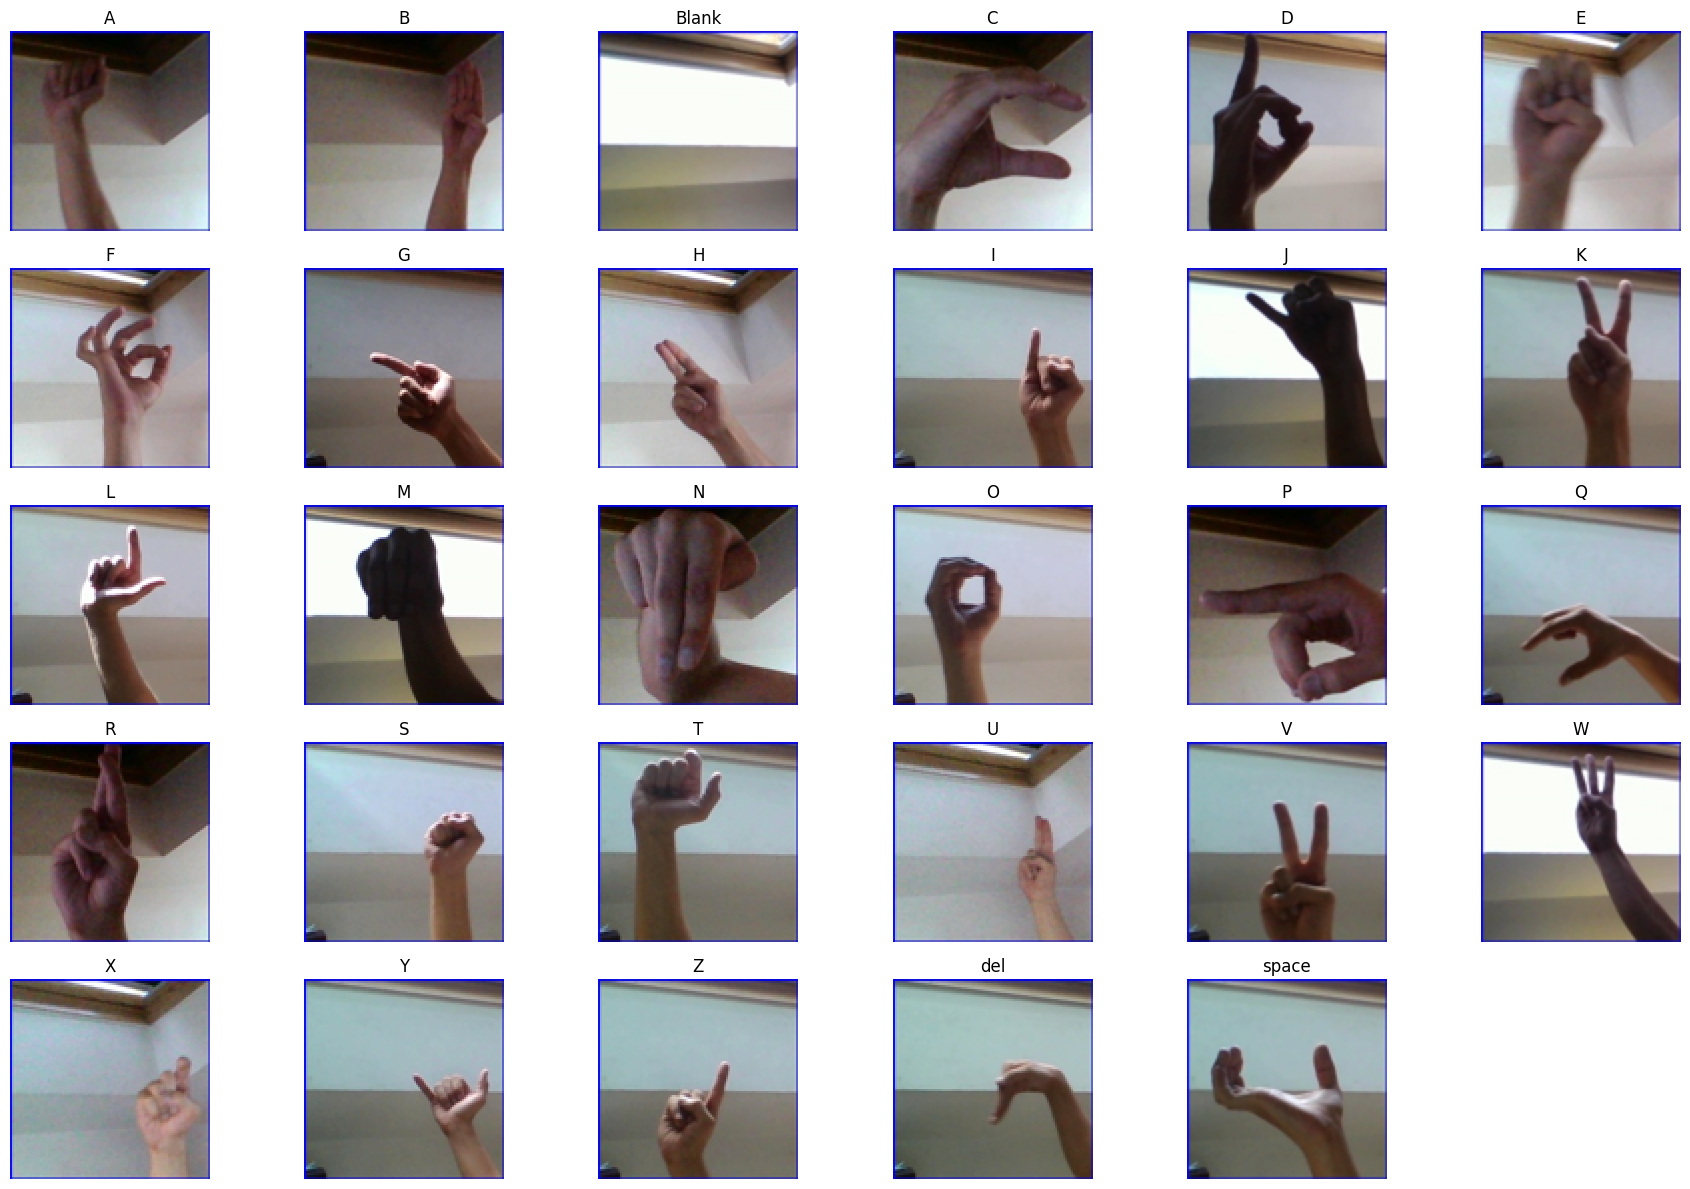

In [4]:
#run class samples visualization
print("Class Samples")
plot_class_samples(train_dir=train_directory, classes=classes)

# View Preprocessed Images

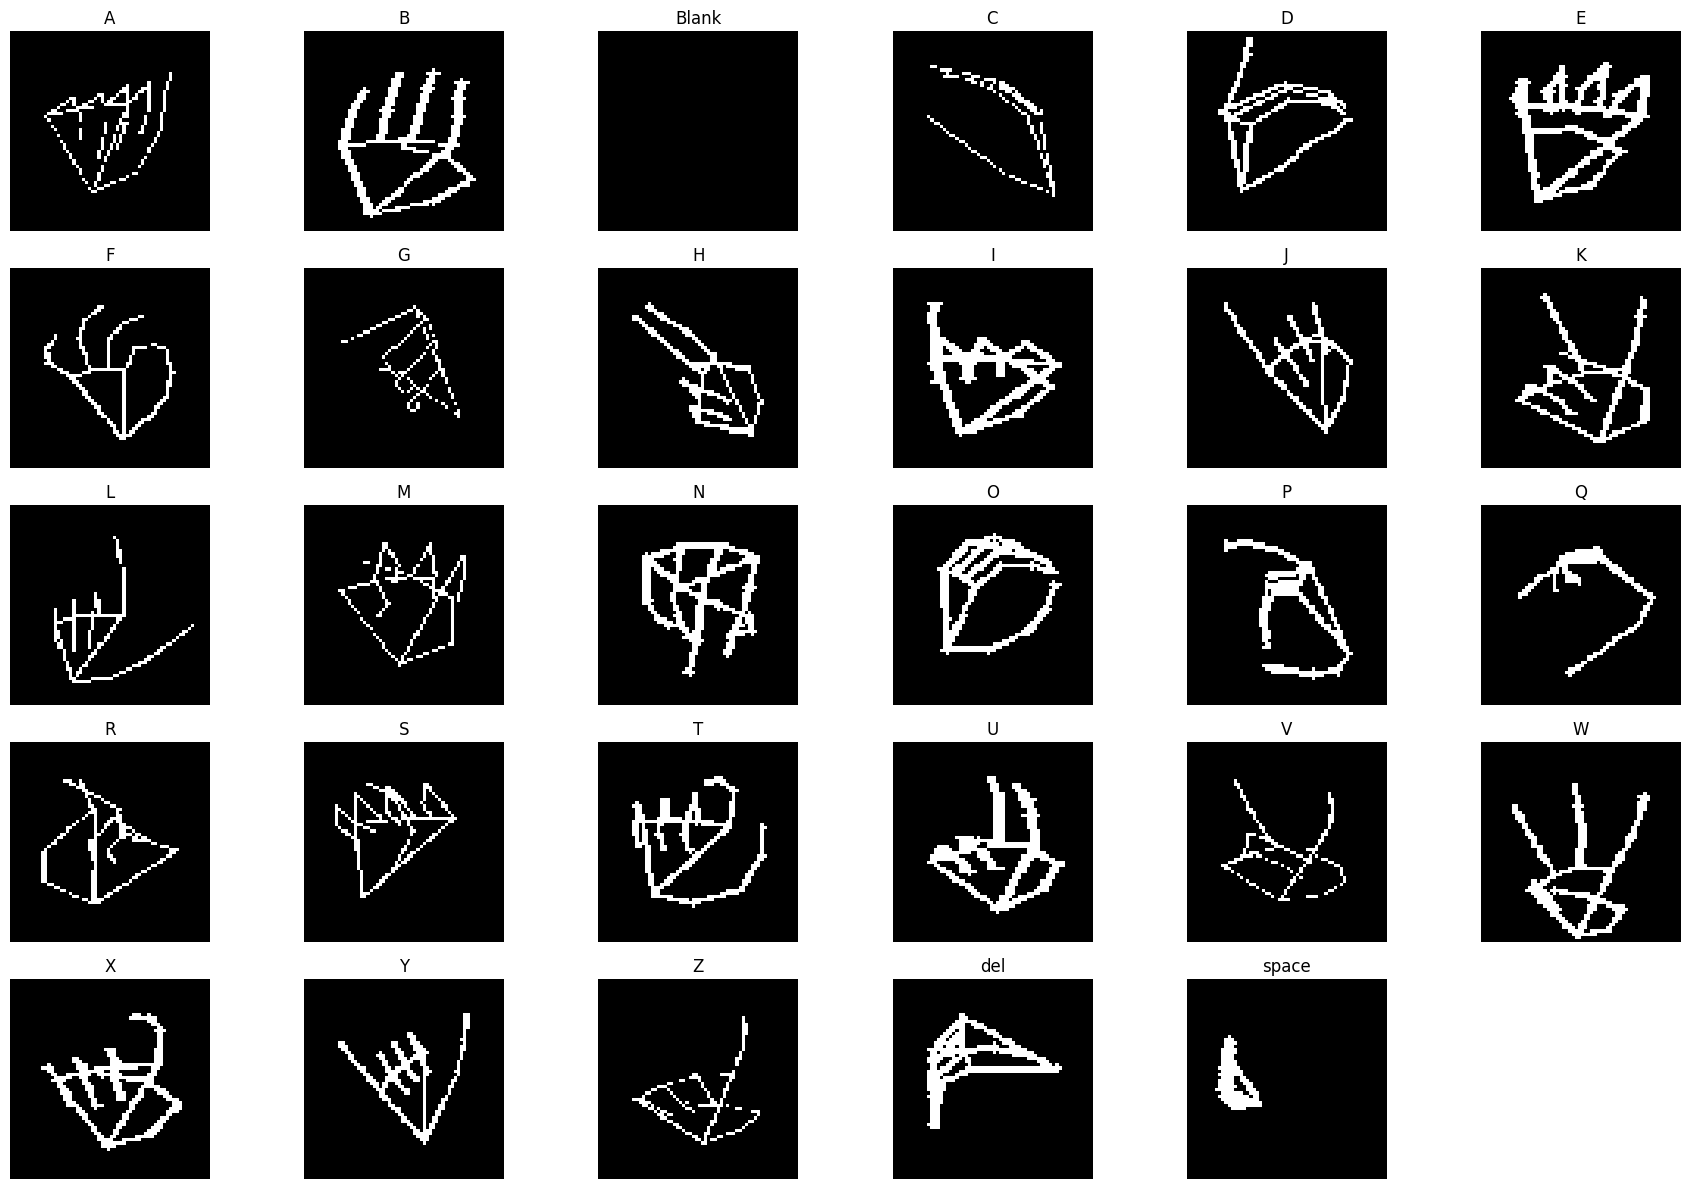

In [5]:
plot_preprocessed_class_samples(classes=classes)

# View Preprocessed Class Distributions

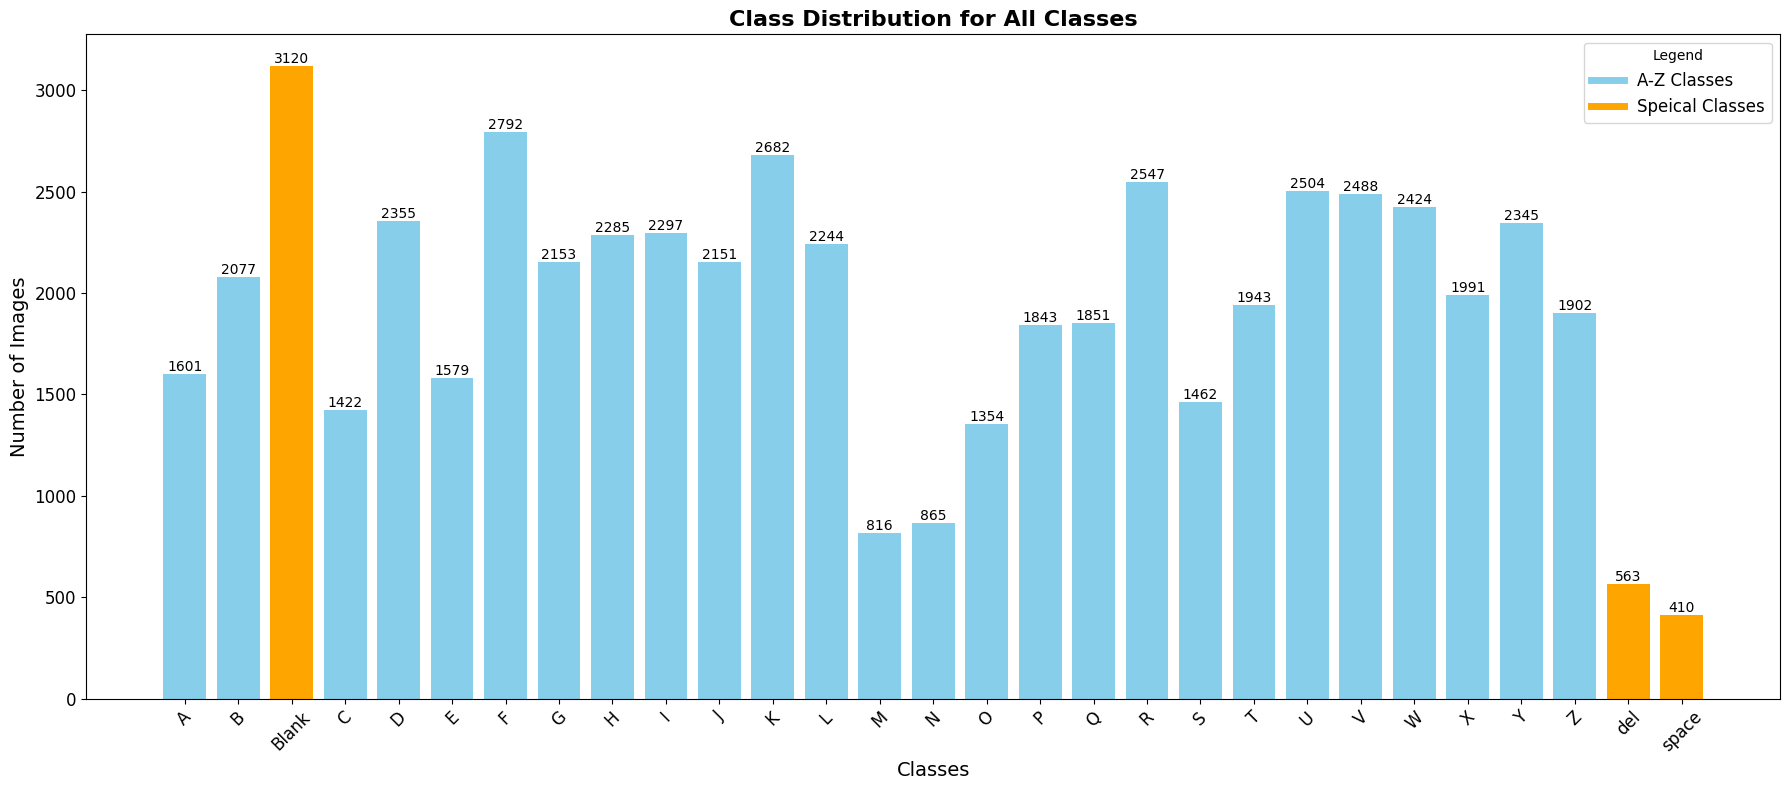

In [6]:
plot_preprocessed_class_distributions()